In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = r"C:\5 Machine Learning\DL\archive (6)\test"

cate = ['angry','disgusted','fearful','happy','neutral','sad','surprised']

In [4]:
for i in cate:
    folders = os.path.join(data , i)
    print(folders)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        print(image_path)

C:\5 Machine Learning\DL\archive (6)\test\angry
C:\5 Machine Learning\DL\archive (6)\test\angry\im0.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im1.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im10.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im100.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im101.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im102.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im103.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im104.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im105.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im106.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im107.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im108.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im109.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im11.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im110.png
C:\5 Machine Learning\DL\archive (6)\test\angry\im111.png
C:\5 Machine Learning\DL\archi

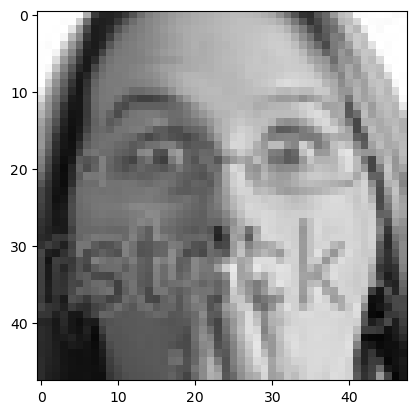

In [5]:
for i in cate:
    folders = os.path.join(data , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break

value of label is  0
value of label is  1
value of label is  2
value of label is  3
value of label is  4
value of label is  5
value of label is  6


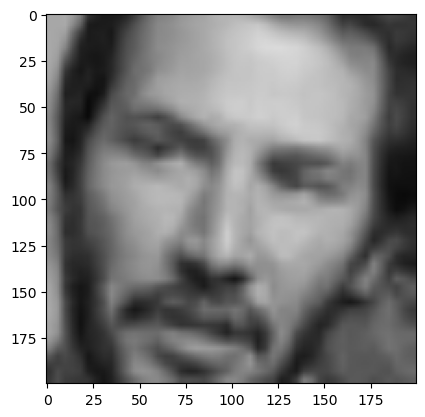

In [6]:
input_image = []

for i in cate:
    folders = os.path.join(data, i)
    label = cate.index(i)
    print('value of label is ', label)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(200,200))
        input_image.append([image_array, label])
        plt.imshow(image_array)

In [7]:
np.random.shuffle(input_image)

In [ ]:
input_image

In [9]:
X = []
Y = []

for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
X.shape

(7178, 200, 200, 3)

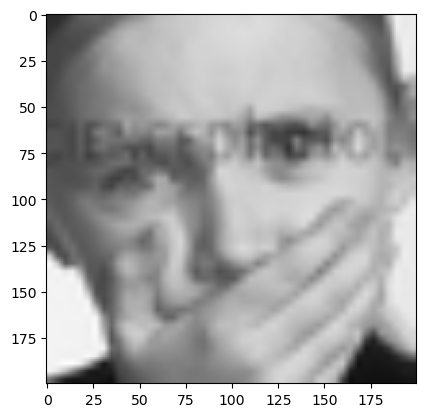

In [12]:
plt.imshow(X[2996])

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [18]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(5,5), input_shape=(200,200,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation = 'softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(X,Y, epochs =9, validation_split=.10, batch_size=64)

Epoch 1/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step - accuracy: 0.9514 - loss: 0.1664 - val_accuracy: 0.3245 - val_loss: 7.2092
Epoch 2/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 376ms/step - accuracy: 0.9567 - loss: 0.1496 - val_accuracy: 0.3189 - val_loss: 7.1130
Epoch 3/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.9562 - loss: 0.1471 - val_accuracy: 0.3231 - val_loss: 7.6230
Epoch 4/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 375ms/step - accuracy: 0.9704 - loss: 0.1145 - val_accuracy: 0.3134 - val_loss: 7.7716
Epoch 5/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.9751 - loss: 0.1068 - val_accuracy: 0.3162 - val_loss: 7.9845
Epoch 6/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9779 - loss: 0.0905 - val_accuracy: 0.3189 - val_loss: 7.9813
Epoch 7/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.9764 - loss: 0.0963 - val_accuracy: 0.3092 - val_loss: 8.1263
Epoch 8/9
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.9811 - loss: 0.0791 - 

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
Epochs = 9

Text(0.5, 1.0, 'Training and validation Accuracy ')

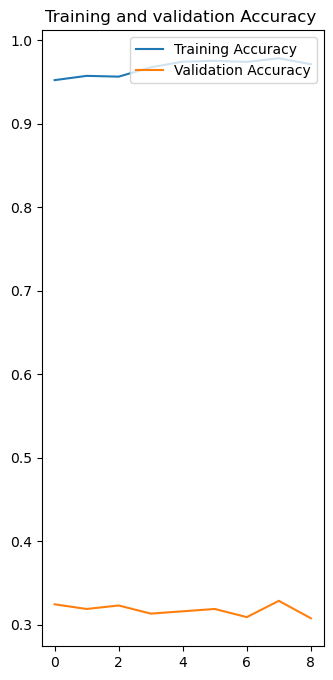

In [78]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc, label='Training Accuracy')
plt.plot(range(Epochs),val_acc, label='Validation Accuracy')
plt.legend(loc= 'upper right' )
plt.title('Training and validation Accuracy ')

In [31]:
#model.fit(X,Y, epochs =10)

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 200, 200, 10)        │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,048,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,149,375 (23.46 MB)

 Trainable params: 2,049,791 (7.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,099,584 (15.64 MB)

In [80]:
pred_values = model.predict(X)
pred_values

225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step


array([[3.9393250e-05, 2.3666303e-18, 4.1956697e-05, ..., 9.9989617e-01,
        2.2519311e-05, 2.8488648e-10],
       [1.9460485e-05, 2.1454071e-07, 1.2225502e-05, ..., 1.8629835e-08,
        2.2187628e-08, 9.9996805e-01],
       [1.2823656e-07, 9.9392924e-11, 1.2105514e-09, ..., 3.3792617e-06,
        9.1720631e-11, 1.0065124e-11],
       ...,
       [2.3685403e-02, 1.0689054e-02, 4.7153034e-03, ..., 3.9037120e-01,
        6.3189073e-04, 4.5718350e-03],
       [8.0640298e-01, 3.5982032e-04, 1.0206063e-03, ..., 2.8287569e-02,
        1.2190734e-01, 2.1940725e-05],
       [1.9913212e-07, 5.4048622e-13, 1.4887393e-05, ..., 9.9998486e-01,
        8.0373548e-09, 2.7934860e-08]], dtype=float32)

In [81]:
pred_class = np.argmax(pred_values, axis=1)
pred_class

array([4, 6, 3, ..., 3, 0, 4], dtype=int64)

In [82]:
len(pred_class)

7178

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
cm = confusion_matrix(Y, pred_class)
cm

array([[ 868,    1,   22,   14,   22,   25,    6],
       [   1,  103,    4,    1,    2,    0,    0],
       [  15,    4,  946,   16,   20,   17,    6],
       [  28,    0,   51, 1615,   35,   32,   13],
       [  21,    2,   33,   25, 1132,   15,    5],
       [  12,    2,   39,   42,   18, 1121,   13],
       [   8,    0,   23,   22,   15,    8,  755]], dtype=int64)

In [85]:
accuracy_score(Y, pred_class)

0.9111173028698802

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
our model says mood is surprised


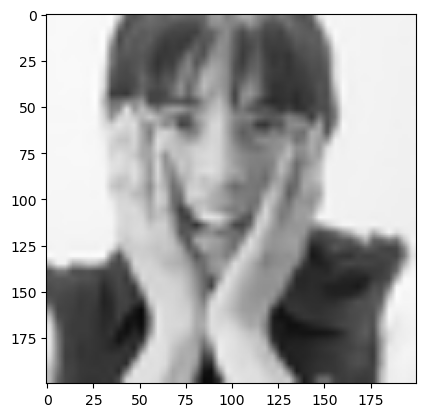

In [94]:
im = random.randint(0,len(Y))
plt.imshow(X[im, :])
plt.show

y_pred = model.predict(X[im, :].reshape(1,200,200,3))
y_pred = y_pred > 0.5
if y_pred[0][0]== True and y_pred[0][1]== False and y_pred[0][2]==False and y_pred[0][3]==False and y_pred[0][4]==False and y_pred[0][5]==False and y_pred[0][6]==False:
    print('our model says mood is angry')
elif y_pred[0][0]== False and y_pred[0][1]== True and y_pred[0][2]==False and y_pred[0][3]==False and y_pred[0][4]==False and y_pred[0][5]==False and y_pred[0][6]==False:
    print('our model says mood is disgusted')
elif y_pred[0][0]== False and y_pred[0][1]== False and y_pred[0][2]==True  and y_pred[0][3]==False and y_pred[0][4]==False and y_pred[0][5]==False and y_pred[0][6]==False:
    print('our model says mood is fearful')
elif y_pred[0][0]== False and y_pred[0][1]== False and y_pred[0][2]==False and y_pred[0][3]==True  and y_pred[0][4]==False and y_pred[0][5]==False and y_pred[0][6]==False:
    print('our model says mood is happy')
elif y_pred[0][0]== False and y_pred[0][1]== False and y_pred[0][2]==False and y_pred[0][3]==False and y_pred[0][4]==True  and y_pred[0][5]==False and y_pred[0][6]==False:
    print('our model says mood is neutral')
elif y_pred[0][0]== False and y_pred[0][1]== False and y_pred[0][2]==False and y_pred[0][3]==False and y_pred[0][4]==False and y_pred[0][5]==True  and y_pred[0][6]==False: 
    print('our model says mood is sad')
else:
    print('our model says mood is surprised')